In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
request_reply_df = pd.read_csv("./data/requestreply.csv", header=None)
reply_reply_df = pd.read_csv("./data/replyreply.csv", header=None)

In [22]:
request_reply_df.describe()

,2,3,4,5,6,7,8,9,10,11,...,92,93,94,95,96,97,98,99,100,101
count,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,...,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000
mean,168.552801,80.671077,38.756572,32.053867,30.741587,29.762200,29.199574,27.477508,26.854041,25.994097,...,25.061934,25.304607,25.449759,25.352015,25.144316,25.101272,26.139811,26.930865,28.847339,33.734174
std,143.484703,139.634386,124.942185,115.652077,108.482573,103.805790,114.714679,104.206368,100.228591,97.246000,...,103.891678,103.689839,104.585712,104.140811,105.343442,105.831126,108.482392,113.407518,149.541268,157.315308
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,110.203981,10.664463,7.254362,6.472051,6.865978,6.719649,6.819010,6.800115,6.838262,6.684005,...,6.622315,6.737947,6.783962,6.749630,6.704092,6.692827,6.615638,6.826102,6.601989,6.671906
50%,125.361919,27.813911,11.111021,9.940505,10.165453,10.082960,10.182023,10.108947,10.139465,10.075569,...,10.021448,10.118008,10.111928,10.084033,10.094404,10.052443,10.025501,10.061979,10.042549,10.014534
75%,216.209472,114.264309,19.995451,15.584529,15.759706,15.511990,15.537262,15.574992,15.710831,15.468359,...,15.242099,15.369892,15.529871,15.397132,15.461623,15.429079,15.504480,15.425980,15.324474,15.388250
max,5317.913055,5216.073036,5111.930847,5008.516073,4904.536963,4800.885916,6366.826057,6265.555143,6161.940098,6053.858995,...,8872.637033,8973.212957,9074.537039,9175.518036,9275.300026,9375.156164,9476.207972,9576.614857,9934.896946,10035.484076


In [23]:
request_reply_df.rename(columns={0:'Malicious'}, inplace=True)

In [5]:
request_reply_df["Malicious"].replace('legit', 0, inplace=True)
request_reply_df["Malicious"].replace('malware', 1, inplace=True)

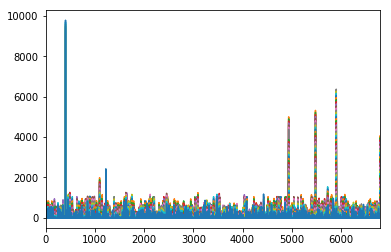

In [6]:
benignware = request_reply_df.loc[request_reply_df["Malicious"] == 0]
benignware.plot(legend=False)

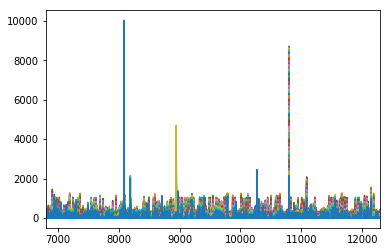

In [7]:
malware = request_reply_df.loc[request_reply_df["Malicious"] == 1]
malware.plot(legend=False)

In [8]:
from prototype_model import *

In [9]:
features = generate_features(request_reply_df)
model = build_fc_model(features)
fc_qr_history, fc_qr_results = train_model(model, request_reply_df)

W0905 20:50:57.271034 4535956928 base_layer.py:1772] Layer sequential is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Epoch 1/15


W0905 20:50:58.301251 4535956928 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


178/178 [==============================] - 4s 24ms/step - loss: 2.0298 - accuracy: 0.5306 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/15
178/178 [==============================] - 1s 8ms/step - loss: 0.8498 - accuracy: 0.5877 - val_loss: 0.8898 - val_accuracy: 0.5692
Epoch 3/15
178/178 [==============================] - 1s 8ms/step - loss: 0.6923 - accuracy: 0.6154 - val_loss: 0.9579 - val_accuracy: 0.5806
Epoch 4/15
178/178 [==============================] - 1s 7ms/step - loss: 0.6346 - accuracy: 0.6475 - val_loss: 1.0297 - val_accuracy: 0.5558
Epoch 5/15
178/178 [==============================] - 1s 7ms/step - loss: 0.6613 - accuracy: 0.6408 - val_loss: 0.8293 - val_accuracy: 0.5959
Epoch 6/15
178/178 [==============================] - 1s 8ms/step - loss: 0.5936 - accuracy: 0.6732 - val_loss: 0.9439 - val_accuracy: 0.6055
Epoch 7/15
178/178 [==============================] - 1s 8ms/step - loss: 0.5672 - accuracy: 0.6948 - val_loss: 0.8641 - val_accuracy: 0.6240
Epoch 8/

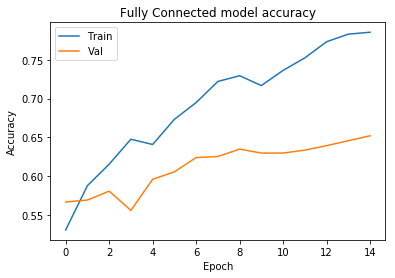

In [10]:
plt.plot(fc_qr_history.history['accuracy'])
plt.plot(fc_qr_history.history['val_accuracy'])
plt.title('Fully Connected model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [11]:
features = generate_features(reply_reply_df)
model = build_fc_model(features)
fc_rr_history, fc_rr_results = train_model(model, reply_reply_df)

W0905 20:51:21.975322 4535956928 base_layer.py:1772] Layer sequential_1 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Epoch 1/15
178/178 [==============================] - 4s 23ms/step - loss: 2.4906 - accuracy: 0.5173 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/15
178/178 [==============================] - 1s 7ms/step - loss: 0.9099 - accuracy: 0.5232 - val_loss: 0.8438 - val_accuracy: 0.5634
Epoch 3/15
178/178 [==============================] - 1s 7ms/step - loss: 0.8200 - accuracy: 0.5359 - val_loss: 0.8308 - val_accuracy: 0.5615
Epoch 4/15
178/178 [==============================] - 1s 8ms/step - loss: 0.7273 - accuracy: 0.5416 - val_loss: 0.7829 - val_accuracy: 0.5749
Epoch 5/15
178/178 [==============================] - 1s 8ms/step - loss: 0.6944 - accuracy: 0.5549 - val_loss: 0.7886 - val_accuracy: 0.5137
Epoch 6/15
178/178 [==============================] - 1s 8ms/step - loss: 0.7065 - accuracy: 0.5619 - val_loss: 0.8539 - val_accuracy: 0.4691
Epoch 7/15
178/178 [==============================] - 1s 7ms/step - loss: 0.6847 - accuracy: 0.5621 - val_loss: 0.8726 - val_accuracy: 0.46

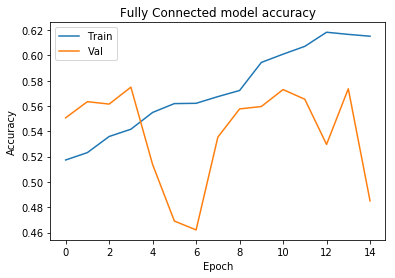

In [12]:
plt.plot(fc_rr_history.history['accuracy'])
plt.plot(fc_rr_history.history['val_accuracy'])
plt.title('Fully Connected model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [13]:
features = generate_features(request_reply_df)
model = build_conv_model(features)
conv_qr_history, conv_qr_results = train_model(model, request_reply_df)

Epoch 1/15
178/178 [==============================] - 6s 31ms/step - loss: 0.7990 - accuracy: 0.5548 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/15
178/178 [==============================] - 3s 16ms/step - loss: 0.6783 - accuracy: 0.5580 - val_loss: 0.6860 - val_accuracy: 0.5214
Epoch 3/15
178/178 [==============================] - 3s 16ms/step - loss: 0.6632 - accuracy: 0.5590 - val_loss: 0.6737 - val_accuracy: 0.5214
Epoch 4/15
178/178 [==============================] - 3s 16ms/step - loss: 0.6427 - accuracy: 0.5909 - val_loss: 0.6531 - val_accuracy: 0.6737
Epoch 5/15
178/178 [==============================] - 3s 16ms/step - loss: 0.6138 - accuracy: 0.6750 - val_loss: 0.6065 - val_accuracy: 0.6960
Epoch 6/15
178/178 [==============================] - 3s 16ms/step - loss: 0.5441 - accuracy: 0.7146 - val_loss: 0.5764 - val_accuracy: 0.6953
Epoch 7/15
178/178 [==============================] - 3s 15ms/step - loss: 0.5036 - accuracy: 0.7496 - val_loss: 0.5684 - val_accuracy

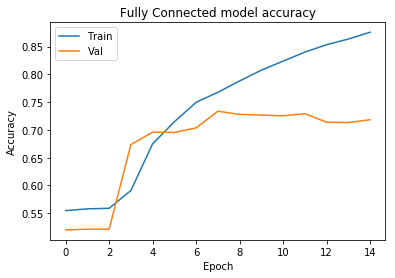

In [14]:
plt.plot(conv_qr_history.history['accuracy'])
plt.plot(conv_qr_history.history['val_accuracy'])
plt.title('Convolutional model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [15]:
print(fc_qr_results, fc_rr_results, conv_qr_results)

[0.8702667258881234, 0.598374] [0.8655887552209802, 0.49539295] [0.7847777162049268, 0.73170733]


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [32]:
dataset = request_reply_df.copy()
dataset.drop(1, axis=1, inplace=True)
labels = dataset.pop("Malicious")
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=.2)

In [33]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
predictions = clf.predict(X_test)

In [38]:
errors = [0 if p == label else 1 for p, label in zip(predictions, y_test)]
accuracy = 1 - (np.sum(errors)/len(errors))
print("Accuracy of random forest classifier:" + str(accuracy))

Accuracy of random forest classifier:0.7528455284552845
